<a href="https://colab.research.google.com/github/harnalashok/classification/blob/main/3A_Stack_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Last amended: 01st June, 2021
Kaggle: https://www.kaggle.com/c/tabular-playground-series-may-2021/overview

Objectives:
         v)  Classifciation using RandomForest, ExtraTreesClassifier
             LogisticRegression and VotingClassifier
        vi) Stacking models through probability wt optimization     



""" 

###Call libraries
(#1--#1.11)

In [124]:
# 1.0 Clear memory
#%reset -f

## A. Data manipulation

# 1.1 Call data manipulation libraries
import pandas as pd
import numpy as np

# 1.2 Data generation
from sklearn.datasets import make_classification

# 1.3 Feature creation Classes
from sklearn.preprocessing import PolynomialFeatures   # Interaction features

# 1.3.1 BoxCox transformations:
from sklearn.preprocessing import PowerTransformer     # BoxCox transformation

# 1.4 For feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFpr
from sklearn.feature_selection import mutual_info_classif, chi2,f_classif
from sklearn.feature_selection import  VarianceThreshold   # Remove constant-value columns

## D. Data preprocessing

# 1.4.1 Scaling data in various manner
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight

# 1.4.2 For encoding target class values
from sklearn.preprocessing import LabelEncoder

# 1.5 Splitting data
from sklearn.model_selection import train_test_split                # Returns split data

## E. Pipelining

# 1.6 Pipelines
from sklearn.pipeline import make_pipeline

## F: Estimators:

# 1.7 Modeling
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

# 1.8 Performance metrics
from sklearn.metrics import  confusion_matrix,log_loss

## G. Optimizer
# 1.9 scipy optimize
from scipy.optimize import minimize

## G: Others
# 1.10 Misc/visualization
import os, time, gc
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 1.11 Display multiple commands output from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Generate data

In [117]:
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html
# 2.0
X,y = make_classification(
                          n_samples=10000,
                          n_features=30,
                          n_informative=25, 
                          n_redundant=5,
                          n_repeated=0,
                          n_classes=9,
                          class_sep=0.7,
                          flip_y=0.1,
                          )

# 2.1 
X.shape            # (10000, 30)

(10000, 30)

In [118]:
# 2.2 About target values and distribution:

np.unique(y)
print()
np.bincount(y)  # Almost balanced

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

array([1108, 1121, 1104, 1103, 1128, 1101, 1093, 1128, 1114])

In [119]:
# 2.3 Perform stratified sampling:

X_train, X_test, y_train,y_test = train_test_split(
                                                   X,
                                                   y,
                                                   test_size = 0.3,
                                                   stratify = y,
                                                   shuffle= True)

# 2.4:
X_train.shape  # (7000, 30)
X_test.shape   # (3000, 30)

(7000, 30)

(3000, 30)

#### Pipeline & model building
Build and use pipe1

In [120]:
# 3.0 Our first pipe:
pipe1 = make_pipeline(
                      StandardScaler(),       # pipe1[0] Try other Scalers also
                      rf(                     # pipe1[1]
                          n_estimators=300,
                          max_depth = 20
                        )
                      )

In [123]:
# 3.1 Train pipe1
pipe1.fit(X_train,y_train)

# 3.2 Make probability predictions:
prob_pipe1 = pipe1.predict_proba(X_test)

# 3.3 Probability shape
print()
prob_pipe1.shape   # (3000, 9)

# 3.4 Logloss for pipe1
print()
log_loss(y_test,prob_pipe1)         # 1.6656872360747987

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=20, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=300, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=Fal

(3000, 9)

1.6656872360747987

### pipe2
Uses `PowerTransformer()`

In [126]:
# 4.0 Instantiate pipe
#     PowerTransform() data
pipe2 = make_pipeline(
                      StandardScaler(),
                      PowerTransformer(),
                      rf(                    
                          n_estimators=100,
                          max_depth = 30
                         )
                       )

# 4.1 Train pipe2 and determine logloss:
pipe2.fit(X_train,y_train)
prob_pipe2 = pipe2.predict_proba(X_test)
print()
prob_pipe2.shape             # (3000,9)
print()
log_loss(y_test,prob_pipe2)  # 1.6770240488569925

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('powertransformer',
                 PowerTransformer(copy=True, method='yeo-johnson',
                                  standardize=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=30, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
          

(3000, 9)

1.6752593439208685

### pipe3
Uses ExtraTreesClassifier

In [127]:
# 5.0 Instantiation
pipe3 = make_pipeline(
                       StandardScaler(),
                       ExtraTreesClassifier(n_estimators=300)
                      )

# 5.1 Train pipe and determine logloss
pipe3.fit(X_train,y_train)
prob_pipe3 = pipe3.predict_proba(X_test)
print()
log_loss(y_test,prob_pipe3)         # 1.6787868142300655

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('extratreesclassifier',
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='auto',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators=300, n_jobs=None,
                                      oob_score=False, random_state=None,
                                      verbose=0, warm_start=False))],
         verbose=False)

(3000, 9)

1.6787868142300655

### pipe4

Experiment here with different data transformations

In [130]:
 6.1
# Another pipe:

pipe4 = make_pipeline(
                      StandardScaler(),
                      PolynomialFeatures(
                                         degree =2,
                                         interaction_only=False
                                         ),
                      
                      VarianceThreshold(
                                         threshold=0.3
                                        ),
                      
                      SelectKBest(
                                   score_func= f_classif,
                                   k=150
                                  ),
                      # SelectFpr() ,  
                      rf(                    
                          n_estimators=100,
                          max_depth = 35,
                         )
                       )

# 6.2
pipe4.fit(X_train,y_train)
prob_pipe4 = pipe4.predict_proba(X_test)
prob_pipe4.shape     # (3000, 9)
print()
log_loss(y_test,prob_pipe4)  # 1.7974766564233063

6.1

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('variancethreshold', VarianceThreshold(threshold=0.3)),
                ('selectkbest',
                 SelectKBest(k=150,
                             score_func=<function f_classif at 0x7fa6725ab710>)),
                ('select...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=35, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
     

(3000, 9)

1.8069420405290526

In [131]:
# 7.0
# Use another Estimator: LogisticRegression()

pipe5 = make_pipeline(
                      StandardScaler(),
                      LogisticRegression(
                                         max_iter = 8000,
                                         ),
                      )


# 7.1 How much is logloss
pipe5.fit(X_train,y_train)
prob_pipe5 = pipe5.predict_proba(X_test)
prob_pipe5.shape   # (18564, 9)

print()
log_loss(y_test,prob_pipe5)    # 1.9415628390694406

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=8000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

(3000, 9)

1.9415628390694406

### Average probabilties through optimization
Calculate weighted average of probabilities to make final probability predictions.

#### How it works?

```
Once you have calculated probability predictions
of the nine classes through different models, you 
can add up probabilities of models in a weighted
manner to determine final probabilities and logloss.
Here is an example.

Let us say there are three classes. Here are the
probability predictions for one observation of test
set from three different models:

class1     class2       class3
0.2        0.4           0.4   =>       Model1
0.6        0.2           0.2   =>       Model2
0.1        0.7           0.2   =>       Model3

Final probability predictions for the three classes
are then calculated, as:

class1:   w1 * 0.2   + w2 * 0.6  +  w3 * 0.1
class2:   w1 * 0.4   + w2 * 0,2  +  w3 * 0.2
class3:   w1 * 0.4   + w2 * 0.2  +  w3 * 0.2

Let us say, for some initial w1,w2,w3 the three
probabilities from Ist test obs form an array of 
three values, prob_class[0,3]. For second, obs 
using the same set of weights, we get a similar 
array, prob_class[1,3] and so on. 

We then calculate overall log_loss (ie error), as:

         log_loss(y_test, prob_class)
         where both y_test and prob_class
         have shape: (n_test_samples,3)

scipy optimize module then tries to move w1, w2 and w3 in
the direction such that next calculation of error (log_loss)
gives (hopefully) better results.

```

#### Explaining scipy optimization
Refer [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) and [here](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-slsqp.html)

To use scipy optimize module, we have to clearly specify objective, constraints and bounds of variables. (Equality constraint means that the constraint function result is to be zero whereas inequality means that it is to be non-negative. )

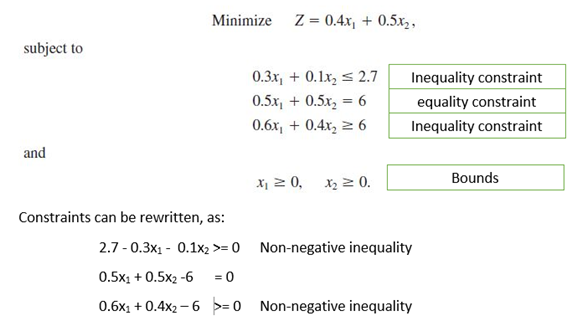

In [71]:
# 8.0 This video explains scipy optimization process
#      in a very easy manner:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/cXHvC_FGx24?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

#### Now optimize with our models

##### First collect our models at one place

In [92]:
# 8.1
# Create a list of all pipes:

clfs = []
clfs.append(pipe1)
clfs.append(pipe2)
clfs.append(pipe3)
clfs.append(pipe4)
clfs.append(pipe5)

##### Then use these pipes to make predictions.
Our X_test has 3000 observations. So each pipe will output an array of predictions of shape (3000,9). Thus, we will have a list of five elements. Each element is an array of shape (3000,9).




In [132]:
# 8.2
# Make a list of all predictions:
predictions = []
for clf in clfs:
    predictions.append(clf.predict_proba(X_test))

# 8.3
print("\n--Predictions from how many models?---\n")
len(predictions)   # 5 

# 8.4 
print("\n\n--Shape of each prediction array--\n")
predictions[0].shape   # (3000,9)

# 8.5
print("\n\n--First three rows of predictions from pipe1--\n")
np.round(predictions[0][:3,:],3)   


--Predictions from how many models?---



5



--Shape of each prediction array--



(3000, 9)



--First three rows of predictions from pipe1--



array([[0.171, 0.133, 0.122, 0.162, 0.074, 0.104, 0.082, 0.121, 0.031],
       [0.2  , 0.082, 0.16 , 0.18 , 0.13 , 0.053, 0.039, 0.08 , 0.075],
       [0.102, 0.065, 0.16 , 0.122, 0.062, 0.217, 0.127, 0.102, 0.042]])

##### Formulate objective and constraints

We have to specify:  
> a. Objective function<br>
> b. Any constraints on weights<br>
> c. Any bounds on weights<br>
> d. Some initial wt values
> e. Use (a) to (d) in an optimizer to determine optimum wts
> f. Repeat (d) and (e) multiple times to make sure that one is not stuck at local optima.


In [137]:
## 9.0 Objective function:

def objective_func(weights):
    ''' scipy minimize will pass the weights as a numpy array '''
    final_prediction = 0
    # We have five wts and five predictions
    for weight, prediction in zip(weights, predictions):
            final_prediction += weight*prediction

    return log_loss(y_test, final_prediction)

In [138]:
# 9.1 This is what happens within objective function:

final_prediction = 0
wts = [0.1,0.2,0.3]
preds = [ np.array([2,5,4]),
          np.array([3,6,9]),
          np.array([1,2,3])
          ]
for weight, prediction in zip(wts, preds):
  print(weight)
  print(prediction)
  print(weight * prediction)
  print("\n---------------\n")
  final_prediction += weight*prediction
  print(final_prediction)
  print(type(final_prediction))
  print("\n================\n")



0.1
[2 5 4]
[0.2 0.5 0.4]

---------------

[0.2 0.5 0.4]
<class 'numpy.ndarray'>


0.2
[3 6 9]
[0.6 1.2 1.8]

---------------

[0.8 1.7 2.2]
<class 'numpy.ndarray'>


0.3
[1 2 3]
[0.3 0.6 0.9]

---------------

[1.1 2.3 3.1]
<class 'numpy.ndarray'>




In [95]:
## 10.1 Constraints on weight values:

# One constraint is sum of all weights
# should be one. That is:
# np.sum(w) = 1
# OR np.sum(w) - 1 = 0
# Define a function accordingly:

def const_f(weights):
  ''' scipy minimize will pass the weights as a numpy array '''
  return np.sum(weights) -1  


In [96]:
# 10.1.1
# Once our constraint function is defined, we need
# to describe it more fully. That is should const(w)
# finally 'equal' zero or not. 

# Following means output of const_f must equal 0
# ie np.sum(weights) = 1  

cons = (
         {'type':'eq',     # So 'equality' constraint
          'fun': const_f   # And constraint function is const()
         }
       )

In [ ]:
# 10.1.2 
# Following means output of const_f must be gretaer than 0
# ie np.sum(weights) -1  >= 0
# Or np.sum(weights) >= 1 

cons1 = (
         {'type':'ineq',     # Inequality constraint
          'fun': const_f   
         }
       )

In [ ]:
# 10.1.3
# Following means output of const_f must be less than 0
# ie 1 - np.sum(weights) >= 0
# Or np.sum(weights) <= 1 


def const_f(weights):
  ''' scipy minimize will pass the weights as a numpy array '''
  return 1- np.sum(weights)  

cons2 = (
         {'type':'ineq',     # Inequality constraint
          'fun': const_f   
         }
       ) 


In [139]:
## 12.0 Bounds of weight-values:

#our weights are bound between 0 and 1
bounds = [(0,1)]*len(predictions)
bounds

[(0, 1), (0, 1), (0, 1), (0, 1), (0, 1)]

In [140]:
## 12.1 Initial wt values

# The algorithm needs some starting wt-values. 
# We select randomly even though sum of these wts
#  is not one:
# 
# Generally, it is better to select many random starting
#  points and run minimize a few times to see which one of the 
#   wt combinations gives best results:

starting_wt_values = np.random.rand(len(predictions))
starting_wt_values

array([0.56570097, 0.94410513, 0.47465465, 0.49125298, 0.1937617 ])

##### Finally apply optimization

In [99]:
# help(minimize)

In [141]:
## 13 Begin optimization process:

res = minimize(
                  fun=objective_func,   # Minimize logloss
                  constraints=cons,     # Our dictionary
                  bounds=bounds,        # Limits of wt values

                  x0 =starting_wt_values,
                  method='SLSQP',
               )

In [142]:
# 13.1 
# We get our best log-loss through:  res['fun']
# Best log loss

res['fun']


2.2381206863470178

In [143]:
# 13.2 Best set of wts that made this possible:

res['x']


array([0.00662468, 0.08810434, 0.56670886, 0.33856213, 0.        ])

In [50]:
############## I am done #################